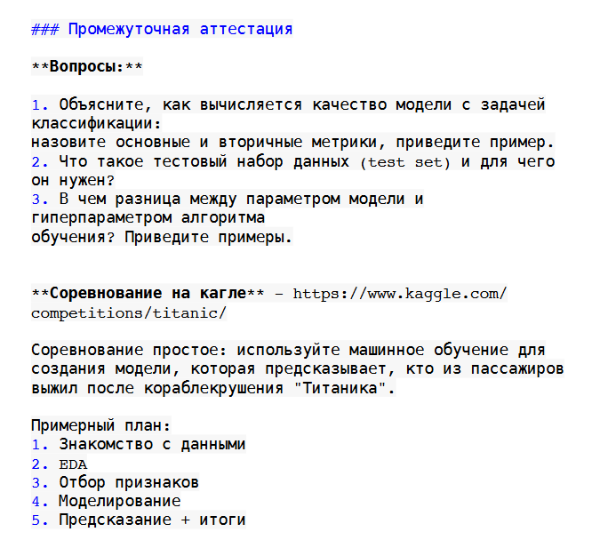

# Шаг 1. Знакомство с данными

Загрузим библиотеки

In [ ]:
import pandas as pd

Загрузим данные

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

Просмотрим первые строки тренировочного набора

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Просмотрим информацию о данных

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


В данных есть пропущенные значения

In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


С данными есть очевидная проблема - минимальная стоимость билетов составила 0 евро, необходимо обработать эти данные, заменив на  медианные:

In [ ]:
train_df['Fare'] = train_df['Fare'].replace(0, train_df['Fare'].median())
test_df['Fare'] = test_df['Fare'].replace(0, test_df['Fare'].median())

Проверка пропущенных значений

In [ ]:
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


В столбце Age — 177 пропущенных значений.
В столбце Cabin — 687 пропущенных значений (значительное количество).
В столбце Embarked — 2 пропущенных значения.

Поскольку пропущенные значения в возрасте достаточно частые, можно заполнить их медианным значением.

In [ ]:
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

Cabin содержит много пропущенных данных, и его значение может быть сложным для интерпретации. Мы можем удалить этот столбец (в нём более 77% пропусков), либо создать бинарный признак (наличие или отсутствие информации о каюте), что мы и сделаем:

In [ ]:
train_df['Has_Cabin'] = train_df['Cabin'].notnull().astype(int)
train_df.drop(columns=['Cabin'], inplace=True)
test_df['Has_Cabin'] = test_df['Cabin'].notnull().astype(int)
test_df.drop(columns=['Cabin'], inplace=True)

Embarked имеет всего 2 пропущенных значения, можно заполнить их наиболее часто встречающимся значением (модой)

In [ ]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)

In [ ]:
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


# Шаг 2: EDA (Исследовательский анализ данных)

Исследуем, сколько пассажиров выжило и сколько погибло.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

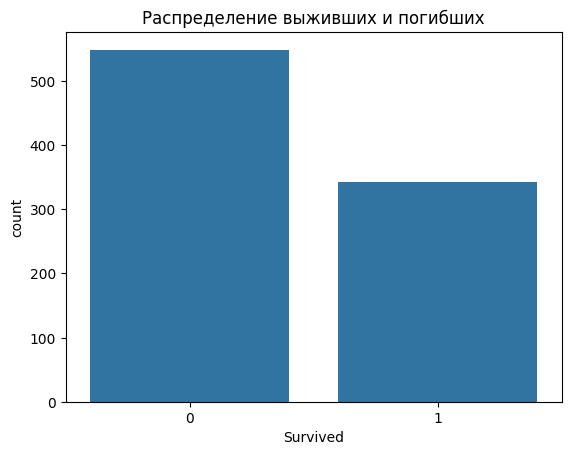

In [ ]:
sns.countplot(x='Survived', data=train_df)
plt.title('Распределение выживших и погибших')
plt.show()

В среднем, половина выжила

Исследуем влияние пола, возраста, класса билета на выживаемость:

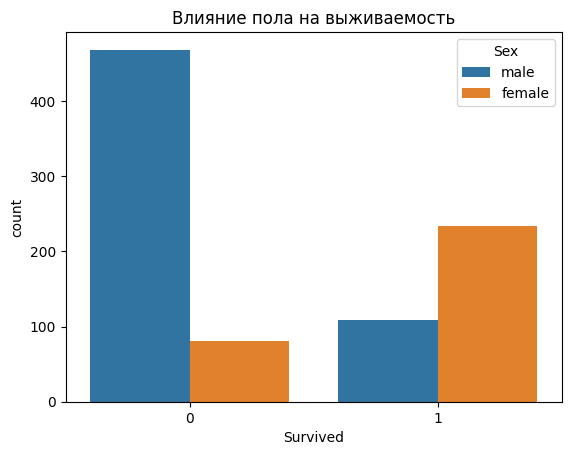

In [ ]:
sns.countplot(x='Survived', hue='Sex', data=train_df)
plt.title('Влияние пола на выживаемость')
plt.show()

Выжило больше женщин

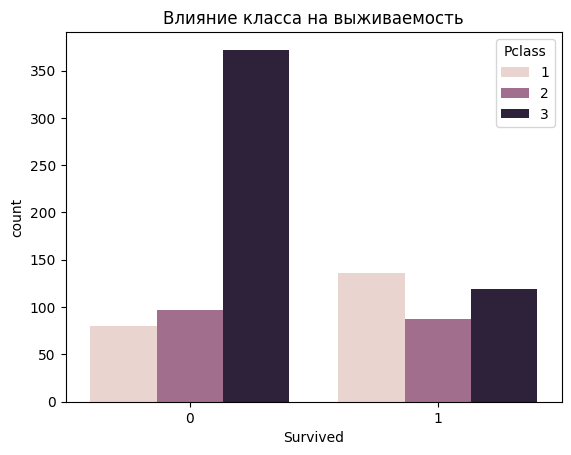

In [ ]:
sns.countplot(x='Survived', hue='Pclass', data=train_df)
plt.title('Влияние класса на выживаемость')
plt.show()

Выжило больше пассажиров из 3 класса

# Шаг 3: Отбор признаков

Необходимости провести преобразование категориальных признаков (Sex и Embarked необходимо преобразовать в числовые)

In [ ]:
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=False)
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked'], drop_first=False)

Удалим ненужные признаки (например, Name, Ticket, PassengerId, вряд ли являются важной информацией для модели)

In [ ]:
train_df.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)
test_df.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

Проверим подготовленные данные

In [ ]:
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Has_Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,1,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,0,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,1,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,0,False,True,False,False,True


# Шаг 4. Моделирование

Построим три вида моделей для сравнения их характеристик и выберем лучшую

Импортируем библиотеки

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

Разделим данные на признаки и целевую переменную

In [ ]:
X_tr = train_df.drop(columns=['Survived'])
y_tr = train_df['Survived']

Разделим данные на тренировочный и тестовый наборы

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.2, random_state=42)

# Шаг 4.1 Логистическая регрессия

Обучим модель логистической регрессии

In [ ]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Сделаем предсказание на валидационном наборе

In [ ]:
y_pred_logreg = logreg.predict(X_val)

 Оценим модель

In [ ]:
accuracy_logreg = accuracy_score(y_val, y_pred_logreg)
print(f"Точность модели логистической регрессии: {accuracy_logreg:.4f}")

Точность модели логистической регрессии: 0.8212


Построим матрицу ошибок

In [ ]:
conf_matrix_logreg = confusion_matrix(y_val, y_pred)
print("Матрица ошибок для логистической регрессии:")
print(conf_matrix)

Матрица ошибок для логистической регрессии:
[[91 14]
 [18 56]]


# Шаг 4.2 Случайный лес

Построим модель случайного леса

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Сделаем предсказание на валидационном наборе

In [ ]:
y_pred_rf = rf_clf.predict(X_val)

Оценим моодель

In [ ]:
accuracy_rf = accuracy_score(y_val, y_pred_rf)
print(f"Точность модели случайного леса: {accuracy_rf:.4f}")

Точность модели случайного леса: 0.7989


Построим матрицу ошибок

In [ ]:
conf_matrix_rf = confusion_matrix(y_val, y_pred_rf)
print("Матрица ошибок для случайного леса:")
print(conf_matrix_rf)

Матрица ошибок для случайного леса:
[[89 16]
 [20 54]]


# Шаг 4.3 Градиентный бустинг

Построим модель градиентного бустинга и обучим ее

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

Сделаем предсказание на валидационном наборе

In [ ]:
y_pred_gb = gb_clf.predict(X_val)

Сделаем оценку модели градиентного бустинга

In [ ]:
accuracy_gb = accuracy_score(y_val, y_pred_gb)
print(f"Точность модели градиентного бустинга: {accuracy_gb:.4f}")

Точность модели градиентного бустинга: 0.8156


Построим матрицу ошибок

In [ ]:
conf_matrix_gb = confusion_matrix(y_val, y_pred_gb)
print("Матрица ошибок для градиентного бустинга:")
print(conf_matrix_gb)

Матрица ошибок для градиентного бустинга:
[[93 12]
 [21 53]]


# Шаг 5. Предсказание + итоги

Для сравнения моделей выведем их точности и матрицы ошибок в виде диаграммы

In [ ]:
import numpy as np

Высчитаем метрики:

In [ ]:
accuracy_logreg = (conf_matrix_logreg[0][0] + conf_matrix_logreg[1][1]) / (conf_matrix_logreg[0][0] + conf_matrix_logreg[1][1] + conf_matrix_logreg[0][1] + conf_matrix_logreg[1][0])
accuracy_rf = (conf_matrix_rf[0][0] + conf_matrix_rf[1][1]) / (conf_matrix_rf[0][0] + conf_matrix_rf[1][1] + conf_matrix_rf[0][1] + conf_matrix_rf[1][0])
accuracy_gb = (conf_matrix_gb[0][0] + conf_matrix_gb[1][1]) / (conf_matrix_gb[0][0] + conf_matrix_gb[1][1] + conf_matrix_gb[0][1] + conf_matrix_gb[1][0])

In [ ]:
precision_logreg = conf_matrix_logreg[1][1]/(conf_matrix_logreg[1][1] + conf_matrix_logreg[0][1])
precision_rf =  conf_matrix_rf[1][1]/(conf_matrix_rf[1][1] + conf_matrix_rf[0][1])
precision_gb = conf_matrix_gb[1][1]/(conf_matrix_gb[1][1] + conf_matrix_gb[0][1])

In [ ]:
recall_logreg = conf_matrix_logreg[1][1] / (conf_matrix_logreg[1][1] + conf_matrix_logreg[1][0])
recall_rf = conf_matrix_rf[1][1] / (conf_matrix_rf[1][1] + conf_matrix_rf[1][0])
recall_gb = conf_matrix_gb[1][1] / (conf_matrix_gb[1][1] + conf_matrix_gb[1][0])

In [ ]:
f1_logreg = 2 * (precision_logreg * recall_logreg) / (precision_logreg + recall_logreg)
f1_rf = 2 * (precision_rf * recall_rf) / (precision_rf + recall_rf)
f1_gb = 2 * (precision_gb * recall_gb) / (precision_gb + recall_gb)

In [ ]:
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
accuracy = [accuracy_logreg, accuracy_rf, accuracy_gb]
precision = [precision_logreg, precision_rf, precision_gb]
recall = [recall_logreg, recall_rf, recall_gb]
f1 = [f1_logreg, f1_rf, f1_gb]

Построим диаграммы

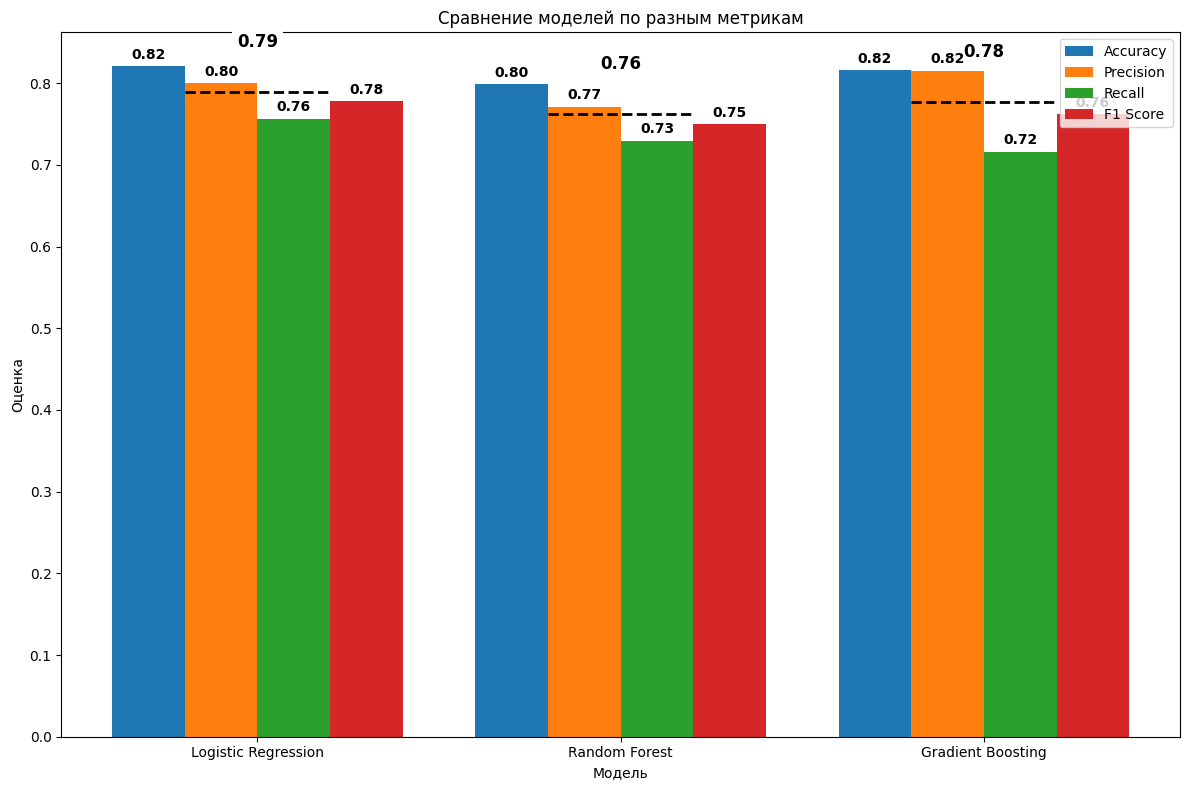

In [ ]:
x = np.arange(len(models))
width = 0.2
mean_values = [(a + p + r + f1_val) / 4 for a, p, r, f1_val in zip(accuracy, precision, recall, f1)]
fig, ax = plt.subplots(figsize=(12, 8))
test_df['Fare'] = test_df['Fare'].fillna(4)
rects1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, precision, width, label='Precision')
rects3 = ax.bar(x + 0.5*width, recall, width, label='Recall')
rects4 = ax.bar(x + 1.5*width, f1, width, label='F1 Score')
for i, mean in enumerate(mean_values):
    ax.hlines(mean, x[i] - width, x[i] + width, colors='black', linestyles='dashed', linewidth=2)
    ax.text(x[i], mean + 0.05, f'{mean:.2f}', color='black', ha='center', va='bottom', fontsize=12, fontweight='bold', bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'))
ax.set_xlabel('Модель')
ax.set_ylabel('Оценка')
ax.set_title('Сравнение моделей по разным метрикам')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
def add_values(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10, fontweight='bold')
add_values(rects1)
add_values(rects2)
add_values(rects3)
add_values(rects4)
fig.tight_layout()
plt.show()

Как видно из диаграммы, лучшие результаты по метрикам у логистической регрессии.

Мы провели сравнение трех моделей машинного обучения — логистической регрессии, случайного леса и градиентного бустинга — по нескольким метрикам: точность (accuracy), точность предсказания положительного класса (precision), полнота (recall) и F1-оценка.

Результаты сравнения моделей:

*   Логистическая регрессия показала лучшие результаты по всем метрикам, что делает её предпочтительным выбором для этой задачи, что может быть связано с тем, что логистическая регрессия хорошо работает на задачах бинарной классификации и способна лучше учесть линейные зависимости между признаками и целевой переменной.
*   Случайный лес также показал достойные результаты, особенно в задачах с большим количеством сложных взаимосвязей между признаками, однако его метрики оказались чуть ниже.
*   Градиентный бустинг продемонстрировал хорошие результаты, но в этом конкретном случае его точность и другие метрики оказались ниже по сравнению с логистической регрессией.





In [ ]:
y_test_pred_logreg = logreg.predict(test_df)
print(y_test_pred_logreg)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1
 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [ ]:
predictions = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],  # Если у вас есть этот столбец в тестовом наборе
    'Survived': y_test_pred_logreg
})

# Сохранение предсказаний в файл
predictions.to_csv('predictions.csv', index=False)

KeyError: 'PassengerId'

In [ ]:
accuracy_test = accuracy_score(y_test_true, y_test_pred_logreg)
print(f"Точность предсказания на тестовых данных: {accuracy_test:.4f}")

NameError: name 'y_test_true' is not defined